In [1]:
import pandas as pd

In [2]:
brics_df= pd.read_csv('US_BRICS_confirmed_cases.csv')
brics_df.head()

,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,1/1/2022,1/2/2022,1/3/2022,1/4/2022,1/5/2022
0,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,...,22250218,22259270,22269031,22281649,22291839,22295621,22297427,22309081,22328252,22328252
1,China,31.8257,117.2264,1,9,15,39,60,70,106,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
2,China,40.1824,116.4142,14,22,36,41,68,80,91,...,1208,1208,1209,1209,1211,1211,1215,1215,1216,1216
3,China,30.0572,107.8740,6,9,27,57,75,110,132,...,611,611,611,611,611,611,611,611,611,611
4,China,26.0789,117.9874,1,5,10,18,35,59,80,...,1352,1354,1358,1359,1363,1372,1372,1383,1390,1396


In [4]:
cases_by_year=brics_df[['Country/Region','Lat','Long','12/31/2020','12/31/2021']]
cases_by_year

,Country/Region,Lat,Long,12/31/2020,12/31/2021
0,Brazil,-14.235000,-51.925300,7681032,22291839
1,China,31.825700,117.226400,993,1009
2,China,40.182400,116.414200,987,1211
3,China,30.057200,107.874000,590,611
4,China,26.078900,117.987400,513,1363
5,China,35.751800,104.286100,182,356
6,China,23.341700,113.424400,2046,3457
7,China,23.829800,108.788100,264,622
8,China,26.815400,106.874800,147,160
9,China,19.195900,109.745300,171,190


In [5]:
confirmedcases_df = cases_by_year.groupby(['Country/Region']).sum()
confirmedcases_df = confirmedcases_df.drop(columns=['Lat','Long'])
confirmedcases_df= confirmedcases_df.rename(columns={'12/31/2020':'2020'})
confirmedcases_df= confirmedcases_df.rename(columns={'12/31/2021':'2021'})
confirmedcases_df

,2020,2021
Country/Region,,
Brazil,7681032,22291839
China,95963,115042
India,10286709,34861579
Russia,3127347,10320405
South Africa,1057161,3458286
US,20163970,54742382


In [6]:
change_rate = (confirmedcases_df['2021']-confirmedcases_df['2020'])/confirmedcases_df['2020']

confirmedcases_df['growth_rate'] = change_rate

confirmedcases_df.sort_values(by=['growth_rate'],ascending=False)

,2020,2021,growth_rate
Country/Region,,,
India,10286709,34861579,2.388992
Russia,3127347,10320405,2.300051
South Africa,1057161,3458286,2.271295
Brazil,7681032,22291839,1.902193
US,20163970,54742382,1.714861
China,95963,115042,0.198816


In [6]:
confirmedcases_df.to_csv('cases_growth.csv')

In [7]:
cases_by_month_2020=brics_df[['Country/Region','Lat','Long','1/31/2020','2/29/2020','3/31/2020','4/30/2020','5/31/2020','6/30/2020','7/31/2020',
                        '8/31/2020','9/30/2020','10/31/2020','11/30/2020','12/31/2020']]

cases_by_month_2020.head()

,Country/Region,Lat,Long,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020
0,Brazil,-14.2350,-51.9253,0,2,5717,87187,516137,1412669,2670451,3914829,4817365,5537763,6341965,7681032
1,China,31.8257,117.2264,237,990,990,991,991,991,991,991,991,991,992,993
2,China,40.1824,116.4142,139,411,580,593,593,922,933,935,936,942,951,987
3,China,30.0572,107.8740,211,576,579,579,579,582,583,583,584,589,590,590
4,China,26.0789,117.9874,120,296,343,356,358,363,366,383,409,437,489,513


In [8]:
groupby_cases_2020=cases_by_month_2020.groupby(['Country/Region']).sum()
groupby_cases_2020=groupby_cases_2020.drop(columns=['Lat','Long'])
groupby_cases_2020

,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020
Country/Region,,,,,,,,,,,,
Brazil,0,2,5717,87187,516137,1412669,2670451,3914829,4817365,5537763,6341965,7681032
China,9802,79356,82279,83956,84146,84785,87655,89914,90545,91366,92902,95963
India,1,3,1397,34863,190609,585481,1695988,3691166,6312584,8184082,9462809,10286709
Russia,2,2,2337,106498,405843,646929,838461,992402,1170799,1606267,2275936,3127347
South Africa,0,0,1353,5647,32683,151209,493183,627041,674339,725452,790004,1057161
US,8,25,192079,1080974,1799145,2642487,4566409,6025528,7234446,9170216,13686941,20163970


In [9]:
cases_by_month_2021=brics_df[['Country/Region','Lat','Long','1/31/2021','2/28/2021','3/31/2021','4/30/2021','5/31/2021','6/30/2021','7/31/2021',
                        '8/31/2021','9/30/2021','10/31/2021','11/30/2021','12/31/2021']]

cases_by_month_2021.head()

,Country/Region,Lat,Long,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021
0,Brazil,-14.2350,-51.9253,9208521,10558091,12763392,14675104,16557888,18570296,19922146,20785196,21432362,21814625,22100143,22291839
1,China,31.8257,117.2264,994,994,994,994,1004,1008,1008,1008,1008,1008,1008,1009
2,China,40.1824,116.4142,1038,1049,1049,1057,1059,1078,1089,1117,1124,1162,1191,1211
3,China,30.0572,107.8740,591,591,591,596,598,598,603,603,603,604,610,611
4,China,26.0789,117.9874,541,551,561,592,621,680,737,789,1282,1306,1322,1363


In [10]:
groupby_cases_2021=cases_by_month_2021.groupby(['Country/Region']).sum()
groupby_cases_2021=groupby_cases_2021.drop(columns=['Lat','Long'])
groupby_cases_2021

,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021
Country/Region,,,,,,,,,,,,
Brazil,9208521,10558091,12763392,14675104,16557888,18570296,19922146,20785196,21432362,21814625,22100143,22291839
China,100063,100965,101732,102494,103014,103769,105050,107073,108450,109666,111337,115042
India,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,34861579
Russia,3808348,4198400,4494234,4750755,5013512,5449594,6185249,6820697,7401104,8377984,9468640,10320405
South Africa,1453761,1513393,1548157,1581210,1665617,1973972,2447454,2777659,2902672,2922116,2968052,3458286
US,26316068,28718551,30532694,32423991,33345078,33745462,35065578,39353876,43503368,46009140,48560513,54742382


In [11]:
groupby_cases_2021

,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021
Country/Region,,,,,,,,,,,,
Brazil,9208521,10558091,12763392,14675104,16557888,18570296,19922146,20785196,21432362,21814625,22100143,22291839
China,100063,100965,101732,102494,103014,103769,105050,107073,108450,109666,111337,115042
India,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,34861579
Russia,3808348,4198400,4494234,4750755,5013512,5449594,6185249,6820697,7401104,8377984,9468640,10320405
South Africa,1453761,1513393,1548157,1581210,1665617,1973972,2447454,2777659,2902672,2922116,2968052,3458286
US,26316068,28718551,30532694,32423991,33345078,33745462,35065578,39353876,43503368,46009140,48560513,54742382


In [12]:
groupby_cases_2021_new = groupby_cases_2021.T
groupby_cases_2021_new.reset_index(inplace=True)

In [13]:
groupby_cases_2021_new = groupby_cases_2021_new.rename(columns={'index':'Date'})
groupby_cases_2021_new = groupby_cases_2021_new.rename_axis(None, axis = 1)
groupby_cases_2021_new

,Date,Brazil,China,India,Russia,South Africa,US
0,1/31/2021,9208521,100063,10757610,3808348,1453761,26316068
1,2/28/2021,10558091,100965,11112241,4198400,1513393,28718551
2,3/31/2021,12763392,101732,12221665,4494234,1548157,30532694
3,4/30/2021,14675104,102494,19164969,4750755,1581210,32423991
4,5/31/2021,16557888,103014,28175044,5013512,1665617,33345078
5,6/30/2021,18570296,103769,30411634,5449594,1973972,33745462
6,7/31/2021,19922146,105050,31655824,6185249,2447454,35065578
7,8/31/2021,20785196,107073,32810845,6820697,2777659,39353876
8,9/30/2021,21432362,108450,33766707,7401104,2902672,43503368
9,10/31/2021,21814625,109666,34285814,8377984,2922116,46009140


In [14]:
groupby_cases_2021_new.to_csv('2021_confirmed_cases.csv')

In [15]:
groupby_cases_2020_new = groupby_cases_2020.T
groupby_cases_2020_new.reset_index(inplace=True)
groupby_cases_2020_new = groupby_cases_2020_new.rename(columns={'index':'Date'})
groupby_cases_2020_new = groupby_cases_2020_new.rename_axis(None, axis = 1)
groupby_cases_2020_new

,Date,Brazil,China,India,Russia,South Africa,US
0,1/31/2020,0,9802,1,2,0,8
1,2/29/2020,2,79356,3,2,0,25
2,3/31/2020,5717,82279,1397,2337,1353,192079
3,4/30/2020,87187,83956,34863,106498,5647,1080974
4,5/31/2020,516137,84146,190609,405843,32683,1799145
5,6/30/2020,1412669,84785,585481,646929,151209,2642487
6,7/31/2020,2670451,87655,1695988,838461,493183,4566409
7,8/31/2020,3914829,89914,3691166,992402,627041,6025528
8,9/30/2020,4817365,90545,6312584,1170799,674339,7234446
9,10/31/2020,5537763,91366,8184082,1606267,725452,9170216


In [16]:
groupby_cases_2020_new.to_csv('2020_confirmed_cases.csv')

Text(0, 0.5, '# of confirmed cases')

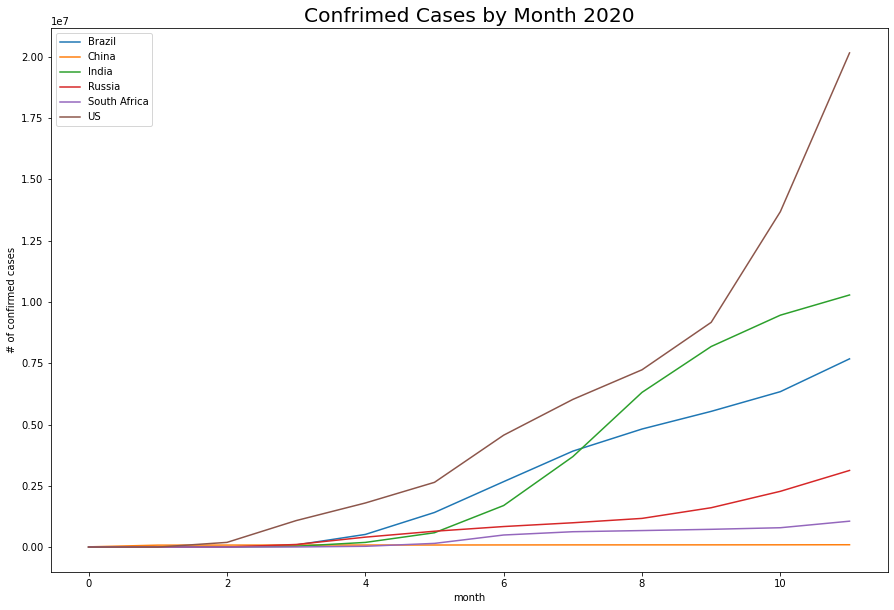

In [17]:
import matplotlib.pyplot as plt
from matplotlib import style

groupby_cases_2020_new.plot(figsize=(15,10))
style.use('fivethirtyeight')
plt.title("Confrimed Cases by Month 2020")
plt.xlabel("month")
plt.ylabel("# of confirmed cases")


Text(0, 0.5, '# of confirmed cases')

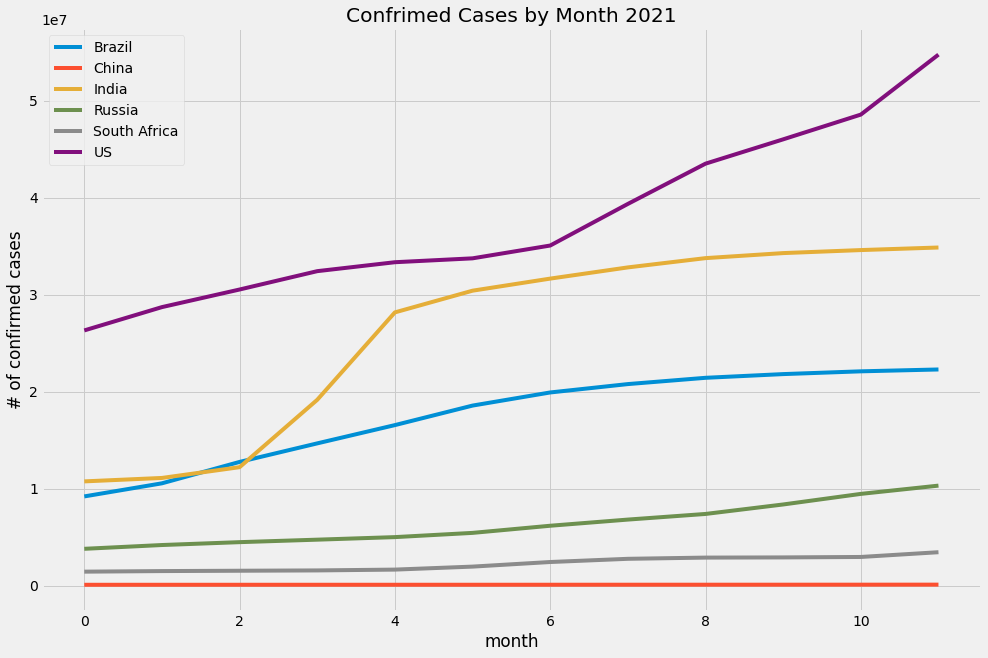

In [18]:
groupby_cases_2021_new.plot(figsize=(15,10))
style.use('fivethirtyeight')
plt.title("Confrimed Cases by Month 2021")
plt.xlabel("month")
plt.ylabel("# of confirmed cases")
